In [1]:
from qiskit import*
from qiskit.tools.visualization import plot_histogram

In [2]:
def create_bellpair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)
    
def encode_message(qc,a,message):
    qc.barrier()
    if message=="00":
        pass
    elif message=="01":
        qc.z(a)
    elif message=="10":
        qc.x(a)
    elif message=="11":
        qc.z(a)
        qc.x(a)
    else:
        print('This message cannot be sent')

def decode_message(qc,a,b):
    qc.barrier()
    qc.cx(a,b)
    qc.h(a) #note we write joint state indivually they are two qubits whose direct product is 
    #taken here a qubit is control bit and b is target bit

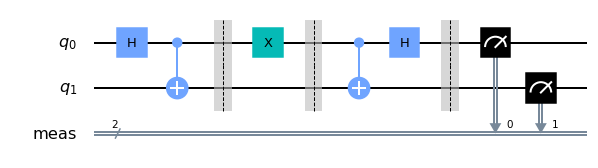

In [3]:
qc=QuantumCircuit(2)
create_bellpair(qc,0,1)
message="10"
encode_message(qc,0,message)
decode_message(qc,0,1)
qc.measure_all()
qc.draw(output='mpl')

In [5]:
backend=BasicAer.get_backend('qasm_simulator')

measurement_result=execute(qc,backend,shots=1024).result()
counts=measurement_result.get_counts(qc)
plot_histogram(counts)
print(measurement_result)

In [20]:
from qiskit.providers.ibmq import least_busy
shots=256

In [21]:
IBMQ.load_account()

/home/nav/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
provider=IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))

In [24]:
print(backend)

ibmq_vigo


In [28]:
job=execute(qc,backend,shots=shots)
from qiskit.tools.monitor import job_monitor
job_monitor(job)


Job Status: job has successfully run


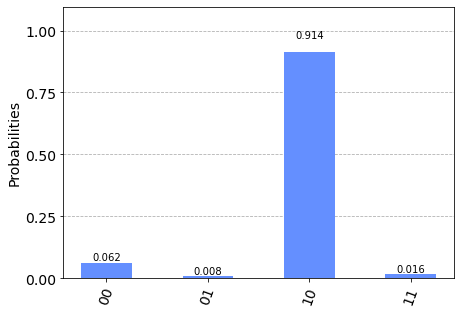

In [29]:
result=job.result()
plot_histogram(result.get_counts(qc))

In [30]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 91.41%
